## Import Dataset


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

diabetes_df = pd.read_csv("datasets/diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


## Train/ Test Split


In [54]:
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit the model


In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/youssef/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predict Probilities passing test features


In [56]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[0.48632951 0.79555461 0.32840249 0.4001484  0.26806017 0.28430794
 0.73563458 0.02407415 0.10260964 0.32031575 0.96084569 0.04489739
 0.23739782 0.3548971  0.8300494  0.79654715 0.70237695 0.07386783
 0.70350233 0.18260386 0.69531193 0.87083281 0.14054876 0.10505263
 0.04777536 0.2959871  0.4293606  0.17571751 0.08559298 0.62250965
 0.35048137 0.51323503 0.17316196 0.6136226  0.12272716 0.81232189
 0.09407295 0.1196786  0.07387543 0.45192691 0.52955541 0.47726283
 0.46694298 0.14686303 0.8880357  0.75054084 0.21507908 0.5562835
 0.30746153 0.25611109 0.29056771 0.16375551 0.17314217 0.08076885
 0.01670059 0.25011327 0.82154738 0.81073268 0.42101941 0.15730097
 0.46302154 0.68919544 0.07755208 0.20773015 0.14162662 0.06670787
 0.28738416 0.03310277 0.62100503 0.55044262 0.3246611  0.12717251
 0.04675101 0.80582951 0.32815084 0.51130851 0.31770816 0.39273304
 0.0185482  0.04348777 0.12426485 0.35128846 0.0785693  0.16469725
 0.59927168 0.24921421 0.20409618 0.12539234 0.44589717 0.57047

## Make Predictions

You can see the predictions made by this model by calling the `predict` function.


In [57]:
y_pred = logreg.predict(X_test)
print(y_pred)

combined = np.column_stack((y_pred_prob, y_pred))
print(combined)

[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1]
[[0.48632951 0.        ]
 [0.79555461 1.        ]
 [0.32840249 0.        ]
 [0.4001484  0.        ]
 [0.26806017 0.        ]
 [0.28430794 0.        ]
 [0.73563458 1.        ]
 [0.02407415 0.        ]
 [0.10260964 0.        ]
 [0.32031575 0.        ]
 [0.96084569 1.        ]
 [0.04489739 0.        ]
 [0.23739782 0.        ]
 [0.3548971  0.        ]
 [0.8300494  1.        ]
 [0.79654715 1.        ]
 [0.70237695 1.        ]
 [0.07386783 0.        ]
 [0.70350233 1.        ]
 [0.18260386 0.        ]
 [0.69531193 1.        ]
 [0.87083281 1.        ]
 [0.14054876 0.        ]
 [0.10505263 0.        ]
 [0.04777536 0.        ]
 [0.2959871  0.        ]
 [0.4293606  0.        ]
 [0.1757175

## Calculate accuracy

You can calculate this accuracy of this model by calling the `score` function.


In [58]:
print("Accuracy on training set:", logreg.score(X_test, y_test))

Accuracy on training set: 0.7532467532467533


## ROC (receiver operating characteristic)

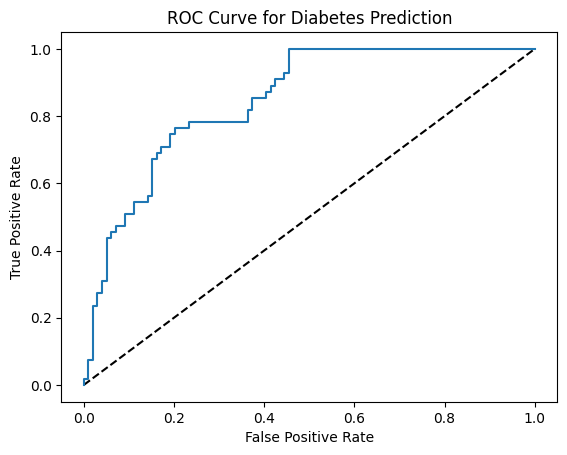

In [59]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

## AUC (area under the curve)

In [61]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8468319559228649
[[86 13]
 [25 30]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

